In [1]:
# import libraries and modules
import os
import glob
import pandas as pd
import numpy as np
import plotly.express as px
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set the working directory:
os.chdir('C:/Users/daphn/dsi-sg/DSIF-SG-9-private/project_4/data/clusters')

In [3]:
# list all the csv files in the directory:
extension = 'csv'
file_list = [i for i in glob.glob('*.{}'.format(extension))]

In [4]:
# init a dataframe to house all csv files:
df_cluster=pd.DataFrame()

# read all the csv files, add column names and combine them into one dataframe:
for f in file_list:
    df_dengue = pd.read_csv(f)
    df_dengue.columns = ['no_cases', 'street', 'latitude', 'longitude', 'cluster_sn', 'recent_2wk', 'total_cases','date', 'mth']
    df_cluster = pd.concat(objs =[df_cluster,df_dengue],axis=0)

In [5]:
df_cluster.head()

no_cases                          street  latitude   longitude  cluster_sn  \
0         4   tampines avenue 5 (block 860)  1.355432  103.937808           1   
1         1  tampines avenue 5 (block 860b)  1.355421  103.937119           1   
2         5   tampines avenue 5 (block 861)  1.355118  103.937242           1   
3         1  tampines avenue 5 (block 861a)  1.354666  103.937225           1   
4         2               tampines avenue 8  1.352493  103.930397           1   

   recent_2wk  total_cases    date  mth  
0          -1          119  130523    5  
1          -1          119  130523    5  
2          -1          119  130523    5  
3          -1          119  130523    5  
4          -1          119  130523    5

In [6]:
# create a function to find region of a location using its coordinates:

def get_region(lat, lng):
    
    # define the boundaries of each region in Singapore

    central_region = [1.290270, 103.851959]
    east_region = [1.341030, 103.967452]
    north_region = [1.418033, 103.827057]
    northeast_region = [1.382439, 103.897702]
    west_region = [1.357147, 103.708615]

    # check if the given coordinates fall within one of the boundaries
    if lat <= 1.3540 and  103.7799 <= lng <= 103.9070:
        return "Central"
    elif lat <= 1.3730 and lng >= 103.8862:
        return "East"
    elif 1.320023 <= lat <= 1.417752 and 103.803837 <= lng <= 103.987354:
        return "Northeast"
    elif lat >= 1.402 and 103.71 <= lng <= 103.964914:
        return "North"
    elif lng <= 103.780:
        return "West"
    else:
        return "Unknown Region"

In [7]:
# add a new column 'region' with the corresponding region for each coordinate
df_cluster['region'] = df_cluster.apply(lambda row: get_region(row['latitude'], row['longitude']), axis=1)

In [8]:
df_cluster.loc[df_cluster['region']=='Unknown']

Empty DataFrame
Columns: [no_cases, street, latitude, longitude, cluster_sn, recent_2wk, total_cases, date, mth, region]
Index: []

In [9]:
df_cluster['date'] = pd.to_datetime(df_cluster['date'], format='%Y-%m-%d', errors='ignore')

In [10]:
df_cluster['week'] = df_cluster['date'].apply(lambda x: x.isocalendar()[1])

In [11]:
df_cluster = df_cluster.reset_index()

In [12]:
df_central = df_cluster[df_cluster['region']=='Central']
df_east = df_cluster[df_cluster['region']=='East']
df_west = df_cluster[df_cluster['region']=='West']
df_north = df_cluster[df_cluster['region']=='North']
df_northeast = df_cluster[df_cluster['region']=='Northeast']

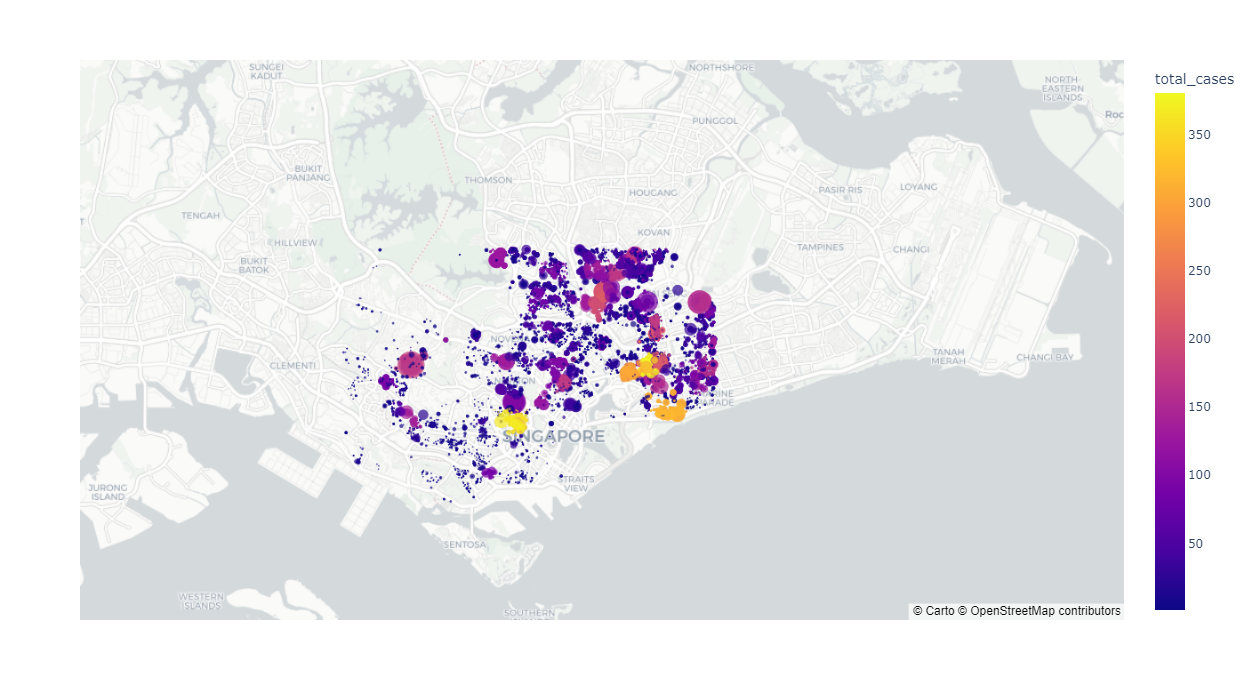

In [13]:
fig = px.scatter_mapbox(df_central, 
                        lat='latitude', 
                        lon='longitude', 
                        hover_data=['no_cases'],
                        color='total_cases',
                        mapbox_style='carto-positron',
                        size='no_cases',
                        zoom=11, 
                        height=700,
                        width=1400)
fig.show()

In [14]:
# read the google search files:
df_google = pd.read_csv('C:/Users/daphn/dsi-sg/DSIF-SG-9-private/project_4/data/cleaned_google_data.csv')

In [15]:
df_google.shape

(389, 14)

In [16]:
df_google.isnull().sum()

Unnamed: 0                   0
week                         0
dengue_fever                 0
dengue                       0
mosquito                     0
insect_repellent             0
dengue_fever_diff            1
dengue_fever_2nd_diff        2
dengue_diff                  1
dengue_2nd_diff              2
mosquito_diff                1
mosquito_2nd_diff            2
insect_repellent_diff        1
insect_repellent_2nd_diff    2
dtype: int64

In [17]:
df_google = df_google.drop(columns=['Unnamed: 0'])

In [18]:
df_google.fillna(0, inplace=True)

In [19]:
df_google.head()

week  dengue_fever  dengue  mosquito  insect_repellent  \
0  2013-05-26            33      30        10                 2   
1  2013-06-02            29      28         9                 3   
2  2013-06-09            56      52        18                 4   
3  2013-06-16            42      39        14                 2   
4  2013-06-23            25      23         8                 2   

   dengue_fever_diff  dengue_fever_2nd_diff  dengue_diff  dengue_2nd_diff  \
0                0.0                    0.0          0.0              0.0   
1               -4.0                    0.0         -2.0              0.0   
2               27.0                   31.0         24.0             26.0   
3              -14.0                  -41.0        -13.0            -37.0   
4              -17.0                   -3.0        -16.0             -3.0   

   mosquito_diff  mosquito_2nd_diff  insect_repellent_diff  \
0            0.0                0.0                    0.0   
1           -1.0                0.0                    1.0   
2            9.0               10.0                    1.0   
3           -4.0              -13.0                   -2.0   
4           -6.0               -2.0                    0.0   

   insect_repellent_2nd_diff  
0                        0.0  
1                        0.0  
2                        0.0  
3                       -3.0  
4                        2.0

In [20]:
df_google.rename(columns={'week':'date'}, inplace=True)

In [21]:
df_google['date'] = pd.to_datetime(df_google['date'], format='%Y-%m-%d', errors='ignore')

In [22]:
df_google['week'] = df_google['date'].apply(lambda x: x.isocalendar()[1])

In [23]:
df_google['year'] = df_google['date'].dt.year

In [24]:
df_google = df_google.drop(columns=['date'])

In [25]:
df_google_14 = df_google[df_google['year'] == 2014]
df_google_15 = df_google[df_google['year'] == 2015]
df_google_16 = df_google[df_google['year'] == 2016]
df_google_17 = df_google[df_google['year'] == 2017]
df_google_18 = df_google[df_google['year'] == 2018]

In [26]:
df_plt = pd.concat(objs =[df_google_14, df_google_15, df_google_16, df_google_17, df_google_18],axis=0)

Text(0.5, 1.0, 'Google Search for "dengue"')

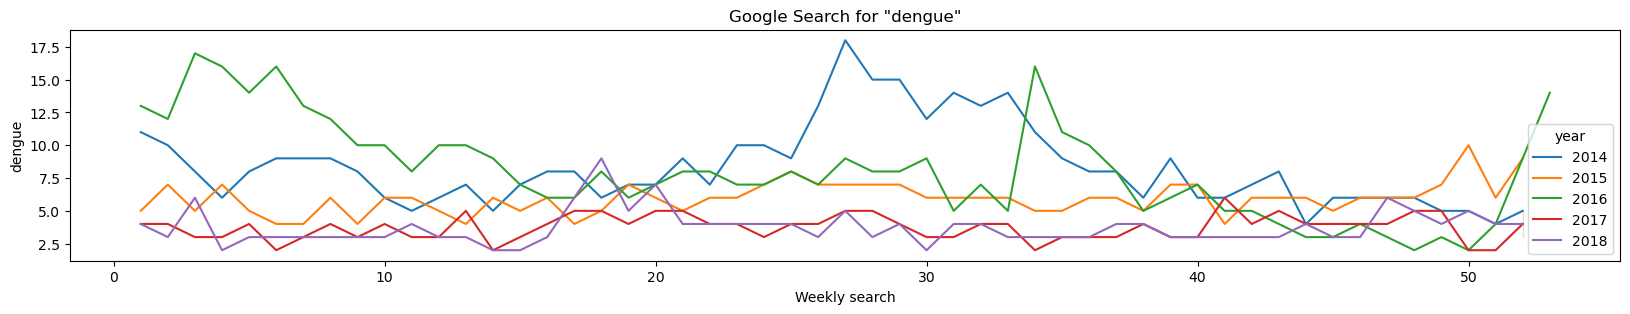

In [27]:
plt.figure(figsize = (20, 3))
google = sns.lineplot(data=df_plt, x= 'week', y = 'dengue', hue='year', palette='tab10').set(xlabel='Weekly search')
plt.title('Google Search for "dengue"')

Text(0.5, 1.0, 'Google Search for "mosquito"')

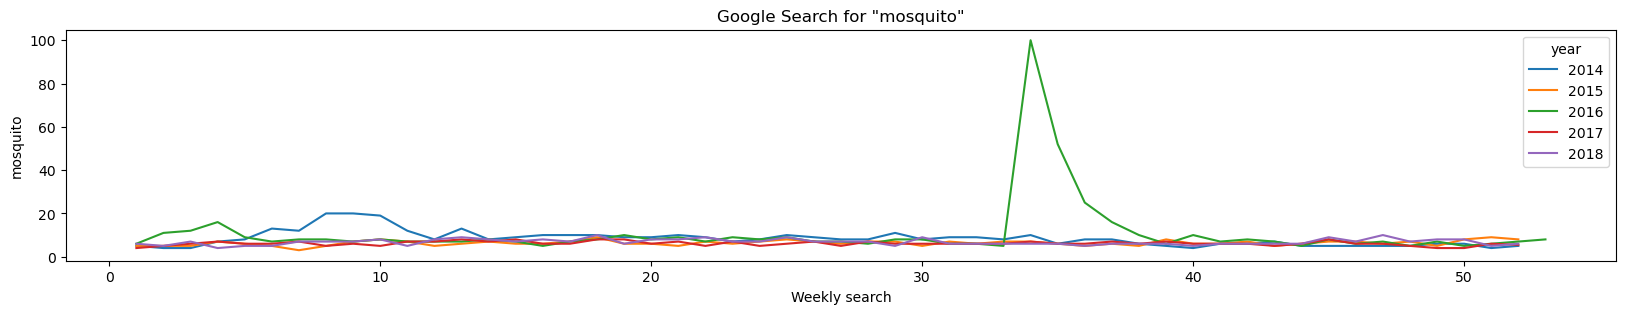

In [28]:
plt.figure(figsize = (20, 3))
google = sns.lineplot(data=df_plt, x= 'week', y = 'mosquito', hue='year', palette='tab10').set(xlabel='Weekly search')
plt.title('Google Search for "mosquito"')

In [29]:
df_climate = pd.read_csv('C:/Users/daphn/dsi-sg/DSIF-SG-9-private/project_4/data/climate_historical_daily_2013-2019.csv')

In [30]:
df_climate = df_climate.drop(columns=['region'])

In [31]:
df_climate.shape

(57564, 19)

In [32]:
df_climate.head()

station    year  month  day  total_daily_rainfall  \
0  Paya Lebar  2018.0    1.0  1.0                  33.2   
1  Paya Lebar  2018.0    1.0  2.0                  10.2   
2  Paya Lebar  2018.0    1.0  3.0                  62.2   
3  Paya Lebar  2018.0    1.0  4.0                   0.3   
4  Paya Lebar  2018.0    1.0  5.0                   1.5   

   highest_30min_rainfall  highest_60min_rainfall  highest_120min_rainfall  \
0                     NaN                     NaN                      NaN   
1                     NaN                     NaN                      NaN   
2                     NaN                     NaN                      NaN   
3                     NaN                     NaN                      NaN   
4                     NaN                     NaN                      NaN   

   mean_temp  max_temp  min_temp  mean_wind_sp  max_wind_sp  station_code  \
0       25.2      27.3      23.8           7.2         27.7             6   
1       25.8      28.4      24.1           8.6         25.9             6   
2       26.8      32.1      24.5           7.6         31.3             6   
3       26.9      29.5      25.0           9.4         33.5             6   
4       26.8      30.0      24.3           9.0         24.1             6   

   latitude  longitude        date  week  rainy_day  
0    1.3524   103.9007  2018-01-01     1          1  
1    1.3524   103.9007  2018-01-02     1          1  
2    1.3524   103.9007  2018-01-03     1          1  
3    1.3524   103.9007  2018-01-04     1          1  
4    1.3524   103.9007  2018-01-05     1          1

In [33]:
df_climate['region']= df_climate.apply(lambda row: get_region(row['latitude'], row['longitude']), axis=1)

In [34]:
df_climate=df_climate.drop(['month','day','station_code', 'latitude', 'longitude', 'date'],axis=1)

In [35]:
agg_climate = df_climate.groupby(['year', 'week', 'region']).agg({'total_daily_rainfall': 'sum',
                                                                    'highest_30min_rainfall': 'max',
                                                                    'highest_60min_rainfall': 'max',
                                                                    'highest_120min_rainfall': 'max',
                                                                    'max_wind_sp': 'max',
                                                                    'max_temp': 'max',
                                                                    'rainy_day': 'max',
                                                                    'mean_temp': 'mean',
                                                                    'mean_wind_sp': 'mean',
                                                                    'min_temp': 'min'})

In [36]:
agg_climate.head(10)

total_daily_rainfall  highest_30min_rainfall  \
year   week region                                                    
2013.0 1    Central                     6.4                     NaN   
            East                       24.2                     NaN   
            North                       4.5                     NaN   
            Northeast                   9.3                     NaN   
            West                       59.2                     NaN   
       21   Central                    92.4                     NaN   
            East                       38.6                     NaN   
            North                      70.2                     NaN   
            Northeast                 124.9                     NaN   
            West                      153.8                     NaN   

                       highest_60min_rainfall  highest_120min_rainfall  \
year   week region                                                       
2013.0 1    Central                       NaN                      NaN   
            East                          NaN                      NaN   
            North                         NaN                      NaN   
            Northeast                     NaN                      NaN   
            West                          NaN                      NaN   
       21   Central                       NaN                      NaN   
            East                          NaN                      NaN   
            North                         NaN                      NaN   
            Northeast                     NaN                      NaN   
            West                          NaN                      NaN   

                       max_wind_sp  max_temp  rainy_day  mean_temp  \
year   week region                                                   
2013.0 1    Central           48.6      30.6          1  26.700000   
            East              39.2      29.7          1  26.350000   
            North             38.2      29.6          1  26.000000   
            Northeast         40.7      30.1          1  26.183333   
            West              53.3      31.5          1  26.137500   
       21   Central           43.9      34.3          1  28.525000   
            East              45.7      33.4          1  28.300000   
            North             38.5      34.5          1  27.400000   
            Northeast         32.0      34.9          1  27.687500   
            West              53.3      34.3          1  28.334286   

                       mean_wind_sp  min_temp  
year   week region                             
2013.0 1    Central       11.287500      24.8  
            East           9.850000      24.8  
            North         11.200000      24.0  
            Northeast     10.116667      24.3  
            West           8.433333      23.6  
       21   Central        4.770000      23.7  
            East           7.100000      23.9  
            North          5.237500      23.7  
            Northeast      4.218750      22.7  
            West           6.627778      23.1

In [37]:
df_climate = agg_climate.iloc[5:]

In [38]:
df_climate.head()

total_daily_rainfall  highest_30min_rainfall  \
year   week region                                                    
2013.0 21   Central                    92.4                     NaN   
            East                       38.6                     NaN   
            North                      70.2                     NaN   
            Northeast                 124.9                     NaN   
            West                      153.8                     NaN   

                       highest_60min_rainfall  highest_120min_rainfall  \
year   week region                                                       
2013.0 21   Central                       NaN                      NaN   
            East                          NaN                      NaN   
            North                         NaN                      NaN   
            Northeast                     NaN                      NaN   
            West                          NaN                      NaN   

                       max_wind_sp  max_temp  rainy_day  mean_temp  \
year   week region                                                   
2013.0 21   Central           43.9      34.3          1  28.525000   
            East              45.7      33.4          1  28.300000   
            North             38.5      34.5          1  27.400000   
            Northeast         32.0      34.9          1  27.687500   
            West              53.3      34.3          1  28.334286   

                       mean_wind_sp  min_temp  
year   week region                             
2013.0 21   Central        4.770000      23.7  
            East           7.100000      23.9  
            North          5.237500      23.7  
            Northeast      4.218750      22.7  
            West           6.627778      23.1

In [39]:
df_climate = pd.DataFrame(df_climate)

In [40]:
df_climate = df_climate.reset_index()

In [41]:
df_climate['yr']= df_climate['year'].astype(int)

In [42]:
df_climate['mean_temp'] = df_climate['mean_temp'].round(1)

In [43]:
df_climate = df_climate.drop(columns = 'year')

In [44]:
df_climate.head()

week     region  total_daily_rainfall  highest_30min_rainfall  \
0    21    Central                  92.4                     NaN   
1    21       East                  38.6                     NaN   
2    21      North                  70.2                     NaN   
3    21  Northeast                 124.9                     NaN   
4    21       West                 153.8                     NaN   

   highest_60min_rainfall  highest_120min_rainfall  max_wind_sp  max_temp  \
0                     NaN                      NaN         43.9      34.3   
1                     NaN                      NaN         45.7      33.4   
2                     NaN                      NaN         38.5      34.5   
3                     NaN                      NaN         32.0      34.9   
4                     NaN                      NaN         53.3      34.3   

   rainy_day  mean_temp  mean_wind_sp  min_temp    yr  
0          1       28.5      4.770000      23.7  2013  
1          1       28.3      7.100000      23.9  2013  
2          1       27.4      5.237500      23.7  2013  
3          1       27.7      4.218750      22.7  2013  
4          1       28.3      6.627778      23.1  2013

In [45]:
df_cluster.head(10)

index  no_cases                          street  latitude   longitude  \
0      0         4   tampines avenue 5 (block 860)  1.355432  103.937808   
1      1         1  tampines avenue 5 (block 860b)  1.355421  103.937119   
2      2         5   tampines avenue 5 (block 861)  1.355118  103.937242   
3      3         1  tampines avenue 5 (block 861a)  1.354666  103.937225   
4      4         2               tampines avenue 8  1.352493  103.930397   
5      5         1   tampines avenue 8 (block 878)  1.352190  103.931279   
6      6         1  tampines street 71 (block 707)  1.357635  103.936851   
7      7         2  tampines street 71 (block 724)  1.356875  103.934915   
8      8         2  tampines street 71 (block 725)  1.357033  103.935196   
9      9         3  tampines street 71 (block 731)  1.357084  103.934096   

   cluster_sn  recent_2wk  total_cases                          date  mth  \
0           1          -1          119 1970-01-01 00:00:00.000130523    5   
1           1          -1          119 1970-01-01 00:00:00.000130523    5   
2           1          -1          119 1970-01-01 00:00:00.000130523    5   
3           1          -1          119 1970-01-01 00:00:00.000130523    5   
4           1          -1          119 1970-01-01 00:00:00.000130523    5   
5           1          -1          119 1970-01-01 00:00:00.000130523    5   
6           1          -1          119 1970-01-01 00:00:00.000130523    5   
7           1          -1          119 1970-01-01 00:00:00.000130523    5   
8           1          -1          119 1970-01-01 00:00:00.000130523    5   
9           1          -1          119 1970-01-01 00:00:00.000130523    5   

  region  week  
0   East     1  
1   East     1  
2   East     1  
3   East     1  
4   East     1  
5   East     1  
6   East     1  
7   East     1  
8   East     1  
9   East     1

In [46]:
df_cluster = pd.DataFrame(df_cluster.loc[5:])

Text(0.5, 1.0, 'Correlation between features and dengue numbers 2013-2020')

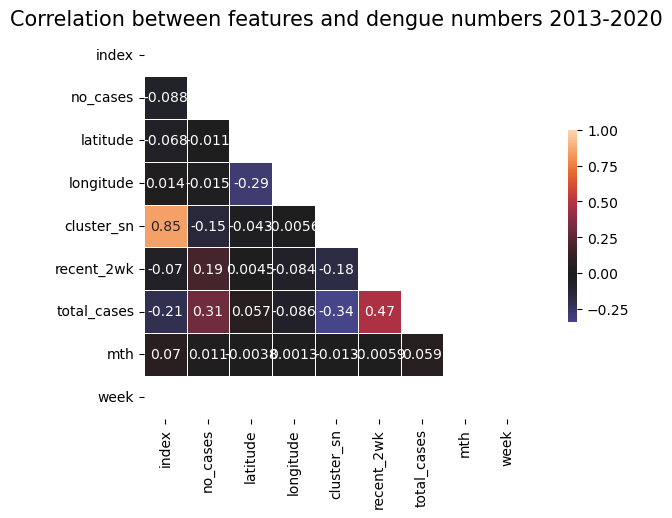

In [50]:
corr = df_cluster.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,5))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5}, annot=True)
ax.set_title('Correlation between features and dengue numbers 2013-2020', fontsize = 15)

In [51]:
# Read the files from the teammate:
df_central_2 = pd.read_csv('C:/Users/daphn/dsi-sg/DSIF-SG-9-private/project_4/data/2013-2020_CENTRAL REGION.csv')
df_east_2 = pd.read_csv('C:/Users/daphn/dsi-sg/DSIF-SG-9-private/project_4/data/2013-2020_EAST REGION.csv')
df_north_2 = pd.read_csv('C:/Users/daphn/dsi-sg/DSIF-SG-9-private/project_4/data/2013-2020_NORTH REGION.csv')
df_northeast_2 = pd.read_csv('C:/Users/daphn/dsi-sg/DSIF-SG-9-private/project_4/data/2013-2020_NORTH-EAST REGION.csv')
df_west_2 = pd.read_csv('C:/Users/daphn/dsi-sg/DSIF-SG-9-private/project_4/data/2013-2020_WEST REGION.csv')

In [52]:
df_central_2.columns

Index(['Unnamed: 0', 'year', 'week', 'cluster_sn', 'no_cases', 'latitude',
       'longitude', 'point', 'pln_area_n', 'region_n', 'pln_total_cases',
       'reg_total_cases', 'total_cases', 'total_daily_rainfall',
       'highest_30min_rainfall', 'highest_60min_rainfall',
       'highest_120min_rainfall', 'max_wind_sp', 'max_temp', 'rainy_day',
       'mean_temp', 'mean_wind_sp', 'min_temp', 'humidity',
       'hdb_1_and_2_room_flats_hse', 'hdb_3_room_flats_hse',
       'hdb_4_room_flats_hse', 'hdb_5_room_and_executive_flats_hse',
       'condominiums_and_other_apartments_hse', 'landed_properties_hse',
       'others_hse', 'total_hdb_hse', 'hdb_1_and_2_room_flats_pop',
       'hdb_3_room_flats_pop', 'hdb_4_room_flats_pop',
       'hdb_5_room_and_executive_flats_pop',
       'condominiums_and_other_apartments_pop', 'landed_properties_pop',
       'others_pop', 'total_hdb_pop', 'total_pop', 'dengue_fever', 'dengue',
       'mosquito', 'insect_repellent', 'dengue_fever_diff',
       'deng

Text(0.5, 1.0, 'Central')

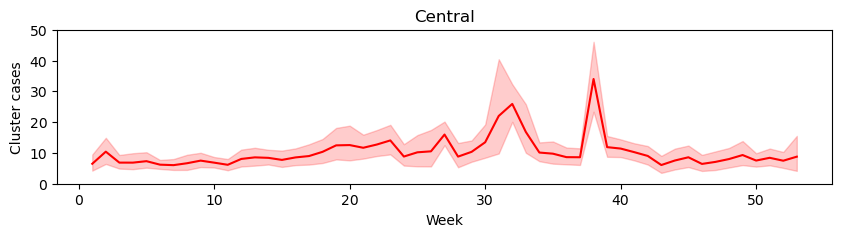

In [53]:
# plot a graph to visualise the dengue cluster spread over the years:
plt.figure(figsize = (10, 2))
temp = sns.lineplot(data=df_central_2, x='week',y='no_cases',color="red", legend='full').set(xlabel='Week', ylabel='Cluster cases', ylim=(0, 50))
plt.title('Central')

Text(0.5, 1.0, 'North')

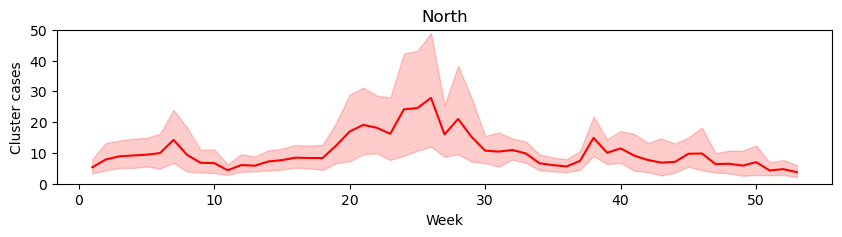

In [54]:
plt.figure(figsize = (10, 2))
temp = sns.lineplot(data=df_north_2, x='week',y='no_cases',color="red", legend='full').set(xlabel='Week', ylabel='Cluster cases', ylim=(0, 50))
plt.title('North')

Text(0.5, 1.0, 'North-East')

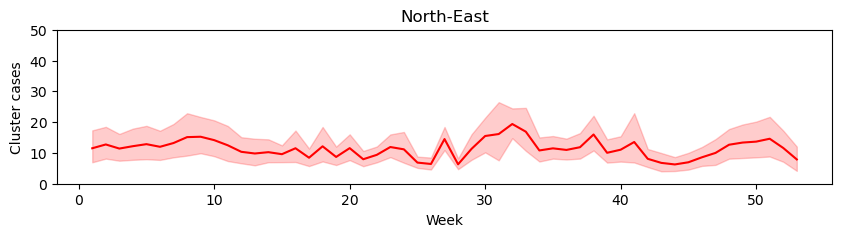

In [55]:
plt.figure(figsize = (10, 2))
temp = sns.lineplot(data=df_northeast_2, x='week',y='no_cases',color="red", legend='full').set(xlabel='Week', ylabel='Cluster cases', ylim=(0, 50))
plt.title('North-East')

Text(0.5, 1.0, 'West')

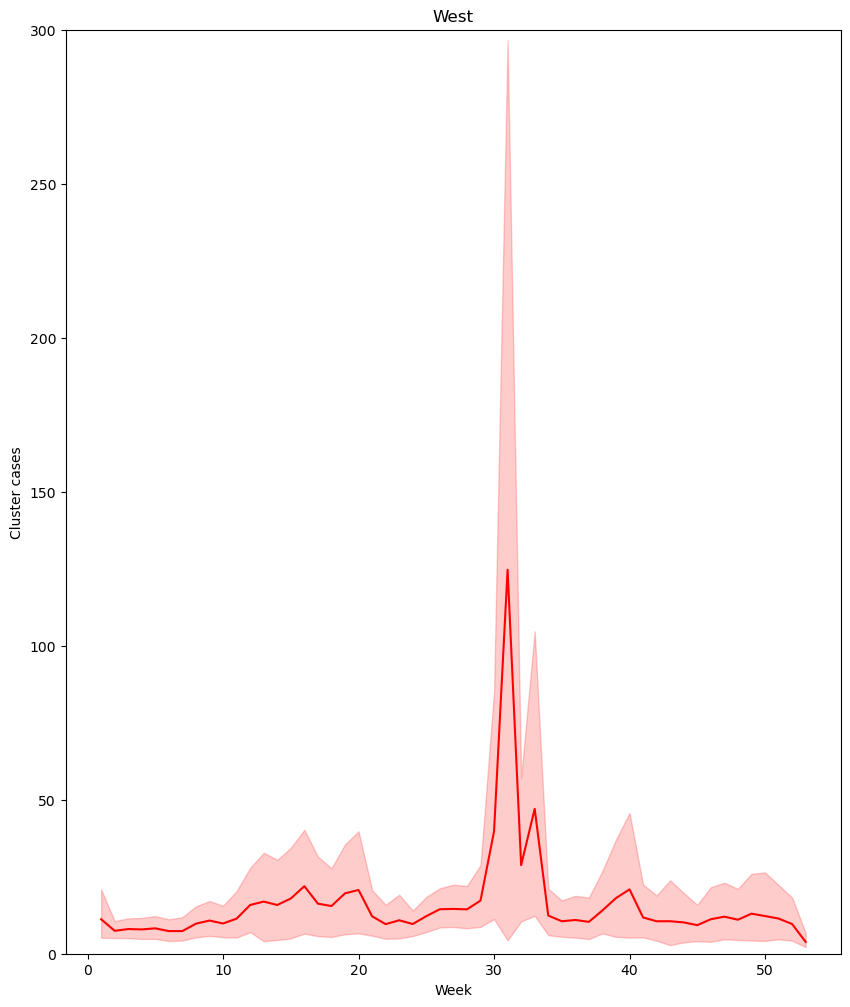

In [56]:
plt.figure(figsize = (10, 12))
temp = sns.lineplot(data=df_west_2, x='week',y='no_cases',color="red", legend='full').set(xlabel='Week', ylabel='Cluster cases', ylim=(0, 300))
plt.title('West')

Text(0.5, 1.0, 'East')

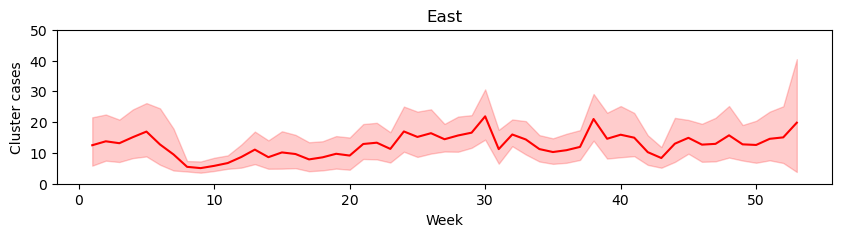

In [57]:
plt.figure(figsize = (10, 2))
temp = sns.lineplot(data=df_east_2, x='week',y='no_cases',color="red", legend='full').set(xlabel='Week', ylabel='Cluster cases', ylim=(0, 50))
plt.title('East')

In [58]:
df_weather = pd.read_csv('C:/Users/daphn/dsi-sg/DSIF-SG-9-private/project_4/data/2013-2020_WEATHER.csv')

In [59]:
df_weather.head()

year  week           region_n  total_daily_rainfall  \
0  2013     1     CENTRAL REGION              0.911111   
1  2013     1        EAST REGION              4.400000   
2  2013     1       NORTH REGION              1.350000   
3  2013     1  NORTH-EAST REGION              1.216667   
4  2013     1        WEST REGION              4.466667   

   highest_30min_rainfall  highest_60min_rainfall  highest_120min_rainfall  \
0                     NaN                     NaN                      NaN   
1                     NaN                     NaN                      NaN   
2                     NaN                     NaN                      NaN   
3                     NaN                     NaN                      NaN   
4                     NaN                     NaN                      NaN   

   max_wind_sp  max_temp  rainy_day  mean_temp  mean_wind_sp  min_temp  
0         53.3      30.6          1  26.425000      9.222222      24.1  
1         39.2      30.4          1  26.350000     12.033333      24.8  
2         38.2      30.1          1  26.133333      9.550000      24.0  
3         40.7      29.5          1  26.300000     12.220000      24.3  
4         38.9      31.5          1  26.125000      8.009091      23.6

Text(0.5, 1.0, 'Temperature and Rainfall 2013-2020')

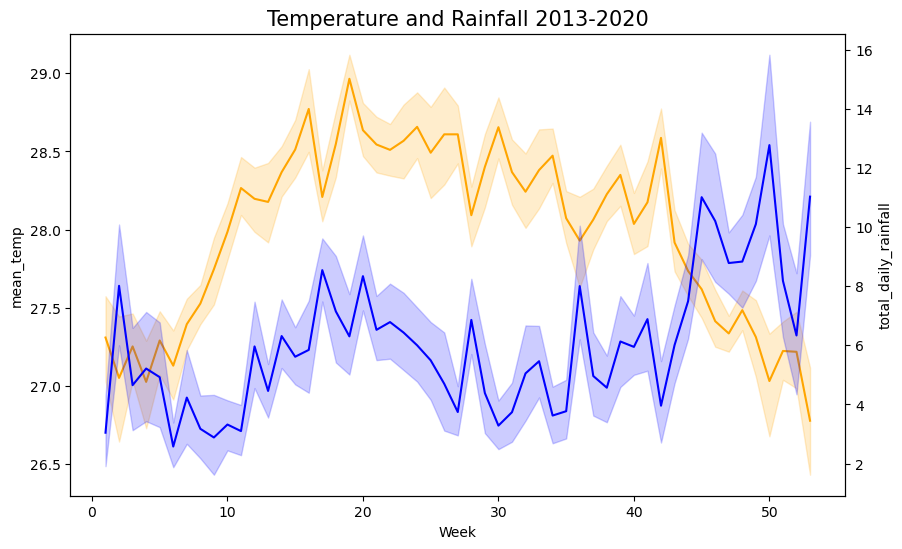

In [60]:
plt.figure(figsize = (10, 6))
temp = sns.lineplot(data=df_weather, x='week',y='mean_temp',color="orange", legend='full').set(xlabel='Week')
ax2 = plt.twinx()
rh = sns.lineplot(data=df_weather, x='week', y='total_daily_rainfall', color="blue", legend='full', ax=ax2)
plt.title('Temperature and Rainfall 2013-2020', fontsize=15)